In [1]:
import numpy as np
import matplotlib.pyplot as plt

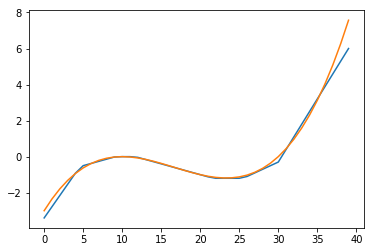

In [13]:
# Generate Data
def cubic(x):
    return x**3 + x**2 - x - 1

def get_cubic_data(start,end,step_size):
    X = np.arange(start, end, step_size)
    X.shape = (len(X),1)
    y = np.array([cubic(X[i]) for i in range(len(X))])
    y.shape = (len(y),1)
    return X,y

def relu(x):
    if x <= 0: return 0
    else: return x


def relu_approximation(start, end, step_size, relus):
    X = np.arange(start, end, step_size)
    X.shape = (len(X),1)
    y_first = -1. * np.array([relu(funcs[0](x)) + relu(funcs[1](x)) + relu(funcs[2](x)) for x in X])
    y_second = np.array([relu(funcs[3](x)) + relu(funcs[4](x)) + relu(funcs[5](x)) for x in X])
    y = y_first + y_second
    y.shape = (len(y), 1)
    return y
    
funcs = [
    lambda x: -5 * x - 7.7,
    lambda x: -1.2 * x - 1.3,
    lambda x: 1.2 * x + 1,
    lambda x: 1.2 * x - 0.2,
    lambda x: 2*x - 1.1,
    lambda x: 5*x - 5
]

# Target function
X,y = get_cubic_data(-2,2,.1)


# Predict
predictions = relu_approximation(-2,2,.1, funcs)

# Visualize
plt.plot(predictions)
plt.plot(y)
plt.show()

In [15]:
import sklearn
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(5,),
                    activation='relu',
                    solver='adam',
                    learning_rate='adaptive',
                    max_iter=100,
                    learning_rate_init=0.01,
                    alpha=0.01)
